# Monte Carlo Poincaré Sections

`DoublePendulumSubclassRandomEnsemble` is a class refactor aiming to plot Poincaré sections



In [1]:
from random import sample

import numpy as np
import sympy as sp
import pandas as pd
import re
import matplotlib.pyplot as plt
#from contourpy.util.data import simple

from MathFunctions import *
from DoublePendulumSubclassRandomEnsemble import DoublePendulum, DoublePendulumEnsemble

----
&nbsp;
### Potential Energy Calculator

We need to find $E_{\text{mech}}$ of the system which is all potential energy when releasing the pendulums from rest

In [2]:
def calculate_potential_energy(theta1_val, theta2_val, parameters, model='simple'):
    """
    Calculate the potential energy of the double pendulum system relative to the datum where theta1 = 0 and theta2 = 0.
    
    Parameters:
    - theta1_val: The angle of the first pendulum (in radians).
    - theta2_val: The angle of the second pendulum (in radians).
    - parameters: A dictionary containing values for l1, l2, m1, m2, M1, M2, g.
    - model: The model type ('simple' or 'compound').
    
    Returns:
    - The relative potential energy V_relative (in Joules).
    """
    l1 = parameters['l1']
    l2 = parameters['l2']
    g = parameters['g']

    if model == 'simple':
        m1 = parameters['m1']
        m2 = parameters['m2']

        # Define potential energy function
        V = -(m1 + m2) * g * l1 * np.cos(theta1_val) - m2 * g * l2 * np.cos(theta2_val)

    elif model == 'compound':
        M1 = parameters['M1']
        M2 = parameters['M2']

        # Define potential energy function for compound model
        V = -M1 * g * (l1 / 2) * np.cos(theta1_val) - M2 * g * ((l1 * np.cos(theta1_val)) + (l2 / 2) * np.cos(theta2_val))
    
    else:
        raise ValueError("Model must be 'simple' or 'compound'")

    # Calculate potential energy at theta1 = 0 and theta2 = 0 (datum)
    V_zero = -(m1 + m2) * g * l1 - m2 * g * l2 if model == 'simple' else -M1 * g * (l1 / 2) - M2 * g * (l1 + (l2 / 2))

    # Calculate relative potential energy
    V_relative = V - V_zero

    return V_relative

In [3]:
parameters = {
    'l1': 1.0,  # Length of the first pendulum (meters)
    'l2': 1.0,  # Length of the second pendulum (meters)
    'm1': 1.0,  # Mass of the first pendulum (kg)
    'm2': 1.0,  # Mass of the second pendulum (kg)
    'M1': 1.0,  # Mass of the first pendulum (compound model)
    'M2': 1.0,  # Mass of the second pendulum (compound model)
    'g': 9.81  # Acceleration due to gravity (m/s^2)
}

angle1 = 120
angle2 = 120

theta1_val = np.deg2rad(angle1)  
theta2_val = np.deg2rad(angle2)  

In [4]:
# Calculate potential energy for the 'simple' model
V_simple = calculate_potential_energy(theta1_val, theta2_val, parameters, model='simple')
print(f"Potential Energy (Simple Model): {V_simple:.2f} J")

# Calculate potential energy for the 'compound' model
V_compound = calculate_potential_energy(theta1_val, theta2_val, parameters, model='compound')
print(f"Potential Energy (Compound Model): {V_compound:.2f} J")

Potential Energy (Simple Model): 44.14 J
Potential Energy (Compound Model): 29.43 J


Maximum (theoretical) mechanical energy for this system is when $\theta_1 = \theta_2 = \pi$

- Potential Energy (Simple Model): 58.86 J
- Potential Energy (Compound Model): 39.24 J



----
&nbsp;
### `DoublePendulumExplorer` instantiation

In [5]:
l1, l2, m1, m2, M1, M2, g = sp.symbols('l1 l2 m1 m2 M1 M2 g', real=True, positive=True)

# Declare functions
theta1 = sp.Function('theta1')(t)
theta2 = sp.Function('theta2')(t)
p_theta_1 = sp.Function('p_theta_1')(t)
p_theta_2 = sp.Function('p_theta_2')(t)

In [6]:
# Parameters
params = {
    g: 9.81,  # Acceleration due to gravity (m/s^2)
    l1: 1.0,  # Length of the first rod (m)
    l2: 1.0,  # Length of the second rod (m)
    m1: 1.0,  # Mass of the first bob (kg)
    m2: 1.0,  # Mass of the second bob (kg)
    M1: 1.0,  # Mass of first uniform rod (kg)
    M2: 1.0   # Mass of second uniform rod (kg)
}

# Time vector

# calculate frames/second
# (time end - time start) * 200 = 24000 steps
# (time end - time start) * 400 = 48000 steps
# (time end - time start) * 800 = 96000 steps

stop = 120
fps = 200  # frames/second
no_steps = stop * fps

time = [0, stop, no_steps]

In [7]:
# Testing simple pendulum instantiation
# Initial conditions (theta1, theta2, omega1, omega2)

init_values = [0, 45, 0, 0]
pendulum1 = DoublePendulum(parameters=params, initial_conditions=init_values, time_vector=time)

The below $E_{\text{mech}}$ corresponds to $\theta_1 = \theta_2 = 120^{\circ}$

In [8]:
# Instantiate DoublePendulumExplorer

simple_explorer = DoublePendulumEnsemble(params, time, 'simple', 44.14)
compound_explorer = DoublePendulumEnsemble(params, time, 'compound', 29.43)

DoublePendulumEnsemble initialized with base class.
DoublePendulumEnsemble initialized with base class.


In [9]:
simple_explorer._run_simulations()

Special Angle Combinations within energy limit: 39
Final length: 1000
Batch 1 of 10 complete. Time taken: 9.98 seconds.
Batch 2 of 10 complete. Time taken: 8.66 seconds.
Batch 3 of 10 complete. Time taken: 8.51 seconds.
Batch 4 of 10 complete. Time taken: 8.48 seconds.
Batch 5 of 10 complete. Time taken: 8.35 seconds.
Batch 6 of 10 complete. Time taken: 8.35 seconds.
Batch 7 of 10 complete. Time taken: 8.39 seconds.
Batch 8 of 10 complete. Time taken: 8.25 seconds.
Batch 9 of 10 complete. Time taken: 8.42 seconds.
Batch 10 of 10 complete. Time taken: 8.23 seconds.
Simulations Complete. Time taken: 137.42 seconds.


----
&nbsp;
### Analysis of integration termination data

In [10]:
df = pd.read_csv('raw_termination_data.csv')
df.head()

,initial_conditions,termination_time,termination_reason
0,"(np.float64(0.5235987755982988), np.float64(2....",34.252016,Large deviation
1,"(np.float64(0.5235987755982988), np.float64(2....",92.438527,Large deviation
2,"(np.float64(0.7853981633974483), np.float64(2....",72.993399,Large deviation
3,"(np.float64(0.7853981633974483), np.float64(2....",50.385264,Large deviation
4,"(np.float64(0.7853981633974483), np.float64(2....",43.851082,Large deviation


In [11]:
unique_reasons = df['termination_reason'].unique()
print(unique_reasons)

['Large deviation']


In [12]:
def extract_floats(condition):
    # extract values wrapped in np.float64
    match = re.findall(r'np\.float64\((.*?)\)', condition)
    if match:
        return tuple(map(float, match))
    else:
        # If no np.float64 wrapping, split the tuple and convert to floats
        stripped = condition.strip("()")
        parts = [x.strip() for x in stripped.split(',')]
        return float(parts[0]), float(parts[1])

# Apply the function and split the result into two new columns
df[['theta1_radians', 'theta2_radians']] = df['initial_conditions'].apply(lambda x: extract_floats(x)).apply(pd.Series)

In [13]:
# Convert radians to degrees and round to 2 decimal places
df['theta1_degrees'] = df['theta1_radians'].apply(lambda x: round(np.degrees(x), 2))
df['theta2_degrees'] = df['theta2_radians'].apply(lambda x: round(np.degrees(x), 2))

df.drop(columns=['initial_conditions', 'termination_reason'], inplace=True)
df = df.sort_values(by='termination_time')

In [14]:
df.head(10)

,termination_time,theta1_radians,theta2_radians,theta1_degrees,theta2_degrees
216,4.996827,2.51301,0.56091,143.98,32.14
455,6.556304,1.74385,2.30301,99.92,131.95
27,6.709494,1.88846,2.22448,108.20,127.45
506,6.816847,2.05552,0.47785,117.77,27.38
481,7.320243,2.40493,0.49922,137.79,28.60
236,7.653181,2.25895,0.93344,129.43,53.48
89,7.822508,2.49815,0.85084,143.13,48.75
261,7.839348,1.31187,2.76183,75.16,158.24
245,8.481201,0.69495,3.10285,39.82,177.78
44,8.576787,2.42302,0.23262,138.83,13.33


In [23]:
df.describe()

,termination_time,theta1_radians,theta2_radians,theta1_degrees,theta2_degrees
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,43.829955,1.700960,1.624017,97.457825,93.049264
std,27.896852,0.720297,0.921392,41.269845,52.791931
min,4.996827,0.038180,0.004920,2.190000,0.280000
25%,22.015041,1.176822,0.782718,67.427500,44.845000
50%,35.732358,1.782620,1.673800,102.140000,95.900000
75%,57.848829,2.180260,2.439405,124.920000,139.765000
max,119.931256,3.139750,3.132560,179.890000,179.480000


Let's visualise this data

In [15]:
def plot_theta1(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['theta1_degrees'], df['termination_time'], c=df['termination_time'], cmap='viridis')
    plt.colorbar(label='Termination Time (s)')
    plt.xlabel('Theta1 (Degrees)')
    plt.ylabel('Termination Time (s)')
    plt.title('Theta1 Degrees vs Termination Time')
    plt.grid(True)
    plt.show()
    
def plot_theta2(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['theta2_degrees'], df['termination_time'], c=df['termination_time'], cmap='plasma')
    plt.colorbar(label='Termination Time (s)')
    plt.xlabel('Theta2 (Degrees)')
    plt.ylabel('Termination Time (s)')
    plt.title('Theta2 Degrees vs Termination Time')
    plt.grid(True)
    plt.show()

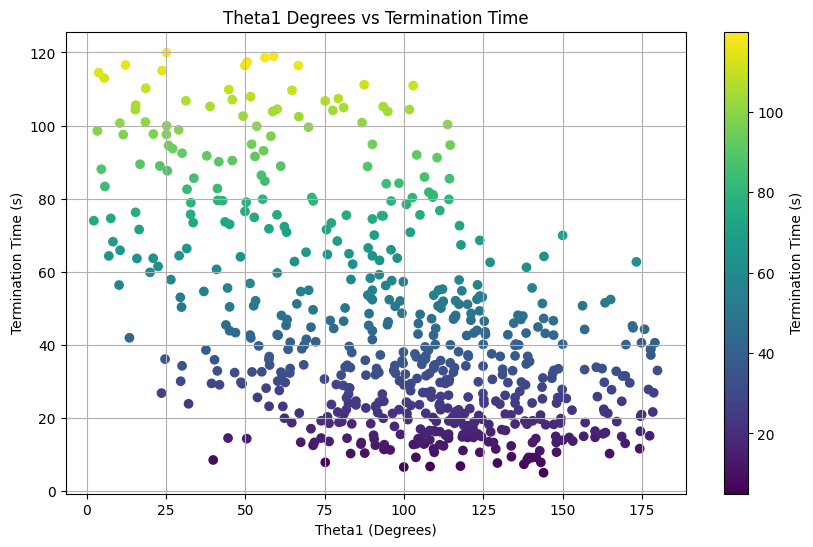

In [16]:
plot_theta1(df)

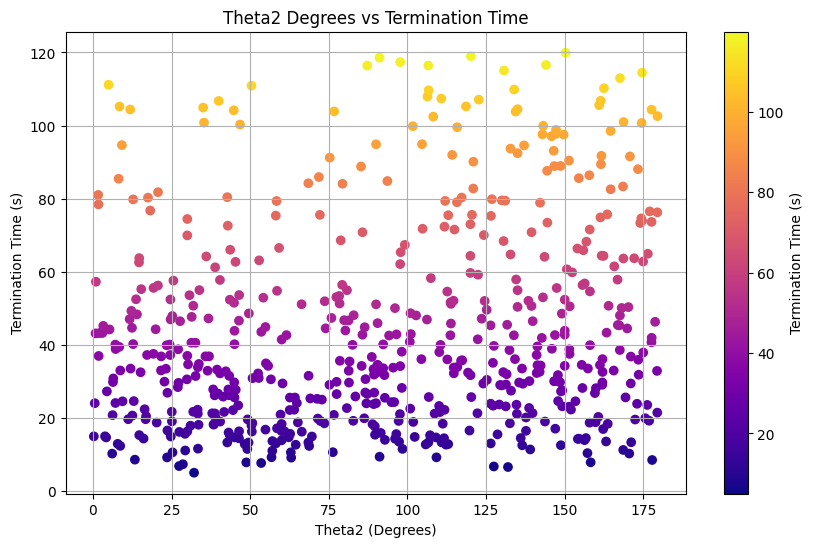

In [17]:
plot_theta2(df)

In [18]:
def check_sign_difference(df, column1, column2):
    sign_diff = (df[column1] * df[column2]) < 0
    return sign_diff

In [19]:
# Check if theta1 and theta2 in radians have different signs
df['sign_difference'] = check_sign_difference(df, 'theta1_radians', 'theta2_radians')

In [20]:
def count_sign_differences(df, column1, column2):
    sign_diff = check_sign_difference(df, column1, column2)
    return sign_diff.sum()

In [21]:
# Count how many times theta1 and theta2 have different signs
sign_diff_count = count_sign_differences(df, 'theta1_radians', 'theta2_radians')
print(f"Sign differences: {sign_diff_count}")

Sign differences: 0


In [22]:
# Output the DataFrame to a CSV file
df.to_csv("clean_termination_data.csv", index=False)

----
&nbsp;
### The Poincaré Section

Check [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) documentation to tweak integrator arguments

In [ ]:
# Define additional parameters for the numerical integration
integrator_args = {
    'rtol': 1e-5,    # default is 1e-3
    'atol': 1e-8     # default is 1e-6
    #'method': 'RK45',
}

With looser tolerances defined above, the solver introduces small errors at each step that accumulate over time, leading to points that are slightly off from their true positions. 

- Tighter tolerances hopefully reduce this drift at the expense of computational load. 

- We want an accurate representation of the system’s dynamics and we want it in a 'reasonable runtime`. These parameters are mutually exclusive

In [ ]:
simple_explorer.find_poincare_section(**integrator_args)

In [ ]:
print(simple_explorer.initial_condition_data.shape)
print(type(simple_explorer.initial_condition_data))
print(len(simple_explorer.initial_condition_data[180]))
print(simple_explorer.initial_condition_data[180][:10])

In [ ]:
print(len(simple_explorer.poincare_section_data[360]))

In [ ]:
simple_explorer.plot_poincare_map()